<a href="https://colab.research.google.com/github/Kathryn-Hise/Physics-Articles-ML/blob/main/3_Loop_of_Decision_Trees_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import io
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from  sklearn.ensemble import RandomForestClassifier
import graphviz
import pydotplus
from sklearn.ensemble import BaggingClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Metadata Reformatted & Validated - Sheet1 (1).csv to Metadata Reformatted & Validated - Sheet1 (1).csv


In [ ]:
#filename = 'only_tfidf.csv'
filename = 'Metadata Reformatted & Validated - Sheet1 (1).csv'
#filename = 'merged_table_better.csv'
#filename = 'metadata_and_tfidf_4.csv'
f = pd.read_csv(io.BytesIO(uploaded[filename]),encoding='unicode_escape')
# Dataset is now stored in a Pandas Dataframe

# Processing Array

In [ ]:
#display(f)

In [ ]:
#remove NaN values
f = f.dropna()

#turn into a numpy array
arr = f.to_numpy()
arr = np.delete(arr, 0, 0)
indexmark = len(arr[1])

In [ ]:
#change into feature categories
Y = arr[:,2]
Y = Y.astype(int)
#print(Y)
X = arr[:,-(indexmark - 3):]
X = X.astype(float)
#print(X)
#print(type(X[1][1]))

# Loop


<Figure size 640x480 with 0 Axes>

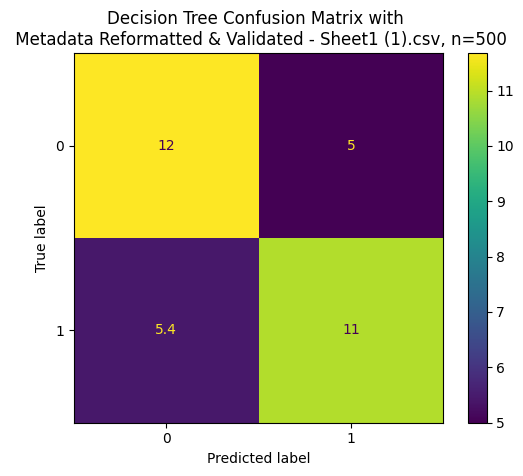

0.6843030303030303


In [ ]:
loopcount = 500
cnf_matrix = [[0,0],[0,0]]
cnf_sum = [[0,0],[0,0]]
for kjh in range(0,loopcount):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
  dst = tree.DecisionTreeClassifier()
  dst.fit(X_train, Y_train)

  cnf_matrix = confusion_matrix(Y_test, dst.predict(X_test))

  #calcuate the accuracy
  accuracy = 0
  for j in range(len(cnf_matrix)):
      accuracy += cnf_matrix[j][j]

  #print("Accuracy:",accuracy/len(Y_test))

  #ordered confusion matrix
  #print(confusion_matrix(Y_test, dst.predict(X_test)))#,labels=["M", "B"]))

  #Prediction with probability
  #print(dst.predict_proba(X_test))

  #feature names
  features_names = ["PubDate","HasDate","NoSources","WordCount","WordsPerSource","NoAuthor","NoImage","NoVideos"]

  #plotting the tree
  dot_data = tree.export_graphviz(dst, out_file=None,
            filled=True, rounded=True, special_characters=True
            )
  graph = pydotplus.graph_from_dot_data(dot_data)
  graph.write_png('tree.png')


  #Bagging
  #print("Bagging")
  max_acc = 0
  best_size_bag = 0

  for i in range(11,30):
      bagging = BaggingClassifier(tree.DecisionTreeClassifier(),n_estimators = i)
      bagging.fit(X_train, Y_train)
      cnf_matrix2 = confusion_matrix(Y_test, bagging.predict(X_test))
      accuracy = 0
      for j in range(len(cnf_matrix2)):
          accuracy += cnf_matrix2[j][j]
      if accuracy > max_acc:
          max_acc = accuracy
          best_size_bag = i
      #print("Size: ", i, "Accuracy:",accuracy/len(Y_test))

  bagging = BaggingClassifier(tree.DecisionTreeClassifier(),n_estimators = best_size_bag)
  bagging.fit(X_train, Y_train)
  #print(bagging.predict(X_test))

  #Random Forest
  #print("Random Forest")
  max_acc = 0
  best_size_forest = 0

  for i in range(11,30):
      forest = RandomForestClassifier(n_estimators = i)
      forest.fit(X_train, Y_train)
      cnf_matrix2 = confusion_matrix(Y_test, forest.predict(X_test))
      accuracy = 0
      for j in range(len(cnf_matrix2)):
          accuracy += cnf_matrix2[j][j]
      if accuracy > max_acc:
          max_acc = accuracy
          best_size_bag = i
      #print("Size: ", i, "Accuracy:",accuracy/len(Y_test))

  forest = RandomForestClassifier(n_estimators = best_size_bag)
  forest.fit(X_train, Y_train)
  #print(forest.predict(X_test))


  #Saving the model for future uses
  joblib.dump(dst,'dst.pkl')

  #Re-use the model
  clf = joblib.load('dst.pkl')
  #print(clf.predict_proba(X_test))
  cnf_sum = cnf_sum + cnf_matrix

cnf_sum = cnf_sum / loopcount
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_sum)
disp.plot()
plt.title(f"Decision Tree Confusion Matrix with \n {filename}, n={loopcount}")
plt.show()

print((cnf_sum[0,0]+cnf_sum[1,1]) / (cnf_sum[0,0]+cnf_sum[1,0]+cnf_sum[0,1]+cnf_sum[1,1]) )

# Training with Decision Trees

In [ ]:
#split the data into a 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
#print(type(X_train[1][4])) #check that its int

In [ ]:
dst = tree.DecisionTreeClassifier()
dst.fit(X_train, Y_train)

cnf_matrix = confusion_matrix(Y_test, dst.predict(X_test))

#calcuate the accuracy
accuracy = 0
for j in range(len(cnf_matrix)):
    accuracy += cnf_matrix[j][j]

print("Accuracy:",accuracy/len(Y_test))

#ordered confusion matrix
print(confusion_matrix(Y_test, dst.predict(X_test)))#,labels=["M", "B"]))

#Prediction with probability
print(dst.predict_proba(X_test))

#feature names
features_names = ["PubDate","HasDate","NoSources","WordCount","WordsPerSource","NoAuthor","NoImage","NoVideos"]

#plotting the tree
import graphviz
import pydotplus
dot_data = tree.export_graphviz(dst, out_file=None,
           filled=True, rounded=True, special_characters=True
           )
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')


#Bagging
print("Bagging")
from sklearn.ensemble import BaggingClassifier
max_acc = 0
best_size_bag = 0

for i in range(11,30):
    bagging = BaggingClassifier(tree.DecisionTreeClassifier(),n_estimators = i)
    bagging.fit(X_train, Y_train)
    cnf_matrix2 = confusion_matrix(Y_test, bagging.predict(X_test))
    accuracy = 0
    for j in range(len(cnf_matrix2)):
        accuracy += cnf_matrix2[j][j]
    if accuracy > max_acc:
        max_acc = accuracy
        best_size_bag = i
    print("Size: ", i, "Accuracy:",accuracy/len(Y_test))

bagging = BaggingClassifier(tree.DecisionTreeClassifier(),n_estimators = best_size_bag)
bagging.fit(X_train, Y_train)
print(bagging.predict(X_test))

#Random Forest
print("Random Forest")
from  sklearn.ensemble import RandomForestClassifier
max_acc = 0
best_size_forest = 0

for i in range(11,30):
    forest = RandomForestClassifier(n_estimators = i)
    forest.fit(X_train, Y_train)
    cnf_matrix2 = confusion_matrix(Y_test, forest.predict(X_test))
    accuracy = 0
    for j in range(len(cnf_matrix2)):
        accuracy += cnf_matrix2[j][j]
    if accuracy > max_acc:
        max_acc = accuracy
        best_size_bag = i
    print("Size: ", i, "Accuracy:",accuracy/len(Y_test))

forest = RandomForestClassifier(n_estimators = best_size_bag)
forest.fit(X_train, Y_train)
print(forest.predict(X_test))


#Saving the model for future uses
import joblib
joblib.dump(dst,'dst.pkl')

#Re-use the model
clf = joblib.load('dst.pkl')
print(clf.predict_proba(X_test))


Accuracy: 0.6666666666666666
[[13  4]
 [ 7  9]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Bagging
Size:  11 Accuracy: 0.7575757575757576
Size:  12 Accuracy: 0.6666666666666666
Size:  13 Accuracy: 0.8181818181818182
Size:  14 Accuracy: 0.8181818181818182
Size:  15 Accuracy: 0.7878787878787878
Size:  16 Accuracy: 0.8484848484848485
Size:  17 Accuracy: 0.7575757575757576
Size:  18 Accuracy: 0.8484848484848485
Size:  19 Accuracy: 0.7878787878787878
Size:  20 Accuracy: 0.8181818181818182
Size:  21 Accuracy: 0.7272727272727273
Size:  22 Accuracy: 0.7575757575757576
Size:  23 Accuracy: 0.8181818181818182
Size:  24 Accuracy: 0.8181818181818182
Size:  25 Accuracy: 0.7575757575757576
Size:  26 Accuracy: 0.7575757575757576
Size:  27 Accuracy: 0.

<Figure size 640x480 with 0 Axes>

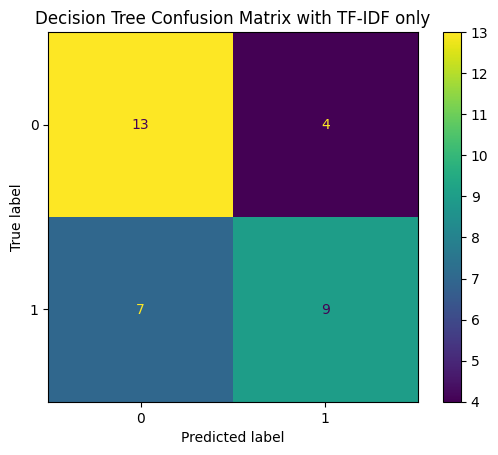

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
predictions = clf.predict(X_test)
#cm = confusion_matrix(Y_test, predictions)#, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
#print(neigh.predict_proba([[0.9]]))
#cm.stats() #return oredered Dictionary
#cm.stats()['overall']['Accuracy']
disp.plot()
plt.title("Decision Tree Confusion Matrix with TF-IDF only")
plt.show()